# Preparation of data



Project by Tan Xin Yu, Oh Rachel, Cho Yu Xin, Hannah Ng Xiao Han

To prepare the train set, we do the following:
- read data frame
- check for missing values
- check data dimensions
- check data distribution
- apply SMOTE(Synthetic Minority Over-sampling Technique) to balance our data set
- convert and split data into arrays for later use.
  specifically, we want the following arrays:
  - full data: the complete dataset
  - X values: array of features (DNA fragments lengths)
  - y values: array of targes labels-
- Label conversion: healthy = 0, cancer = 1.
- convert values to float, if necessary





In [ ]:
import pandas as pd

# Reading data from train set into a data frame
df_train = pd.read_csv('Train_Set.csv')
df_train.head()


,length_51,length_52,length_53,length_54,length_55,length_56,length_57,length_58,length_59,length_60,...,length_392,length_393,length_394,length_395,length_396,length_397,length_398,length_399,length_400,class_label
0,0.000152,0.000081,0.000087,0.000092,0.000099,0.000125,0.000122,0.000115,0.000151,0.000167,...,0.007396,0.007193,0.006973,0.006481,0.006139,0.005958,0.005578,0.005327,0.005142,healthy
1,0.006256,0.006413,0.006512,0.006469,0.006810,0.007070,0.007748,0.008088,0.008671,0.008835,...,0.017830,0.017033,0.016373,0.015371,0.014340,0.013975,0.013243,0.012725,0.012267,healthy
2,0.003783,0.003886,0.004063,0.004237,0.004481,0.004832,0.004960,0.005605,0.005919,0.006480,...,0.010957,0.010481,0.009782,0.009211,0.008800,0.008320,0.007869,0.007286,0.007020,healthy
3,0.004635,0.004471,0.004383,0.004829,0.004920,0.005056,0.005475,0.006158,0.007174,0.007697,...,0.010032,0.008933,0.008970,0.008546,0.008125,0.007587,0.007501,0.006931,0.006663,healthy
4,0.011315,0.010045,0.009795,0.009906,0.010630,0.011467,0.013024,0.014853,0.016874,0.017501,...,0.009118,0.008535,0.008233,0.007754,0.007584,0.006933,0.006530,0.006378,0.005842,healthy


In [ ]:
# Check for missing values in the train set
print("Missing values in train set:", df_train.isnull().values.any())

# Get shape
print("Shape:", df_train.shape)


Missing values in train set: False
Shape: (841, 351)


In [ ]:
import numpy as np

# Converting the full data to an array
train_arr = np.array(df_train)

# Splitting into X (features) and y (class labels)
X_train = train_arr[:, :-1]  # All columns except the last one
X_train = X_train.astype(float) # Convert to float

y_train = train_arr[:, -1]    # Only the last column
y_train = np.where(y_train == 'healthy', 0, 1) # Convert labels to 0 and 1
# Print shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (841, 350)
y_train shape: (841,)


We will perform the same thing on the test set.


In [ ]:
# Reading data from test set into a data frame
df_test = pd.read_csv('Test_Set.csv')
df_test.head()

,length_51,length_52,length_53,length_54,length_55,length_56,length_57,length_58,length_59,length_60,...,length_392,length_393,length_394,length_395,length_396,length_397,length_398,length_399,length_400,class_label
0,0.005657,0.005277,0.005162,0.005267,0.005287,0.005824,0.006033,0.006759,0.007641,0.008071,...,0.015585,0.014792,0.013918,0.013191,0.012644,0.011750,0.011413,0.011053,0.010341,healthy
1,0.005132,0.004886,0.004952,0.005123,0.005237,0.005530,0.006147,0.006655,0.007607,0.008042,...,0.010007,0.009324,0.009207,0.008628,0.008210,0.007823,0.007412,0.007054,0.006992,healthy
2,0.006114,0.005463,0.005444,0.005369,0.005425,0.005897,0.006341,0.007238,0.008696,0.008772,...,0.019935,0.018711,0.017700,0.017124,0.016344,0.015406,0.014876,0.014111,0.013640,healthy
3,0.000158,0.000089,0.000085,0.000097,0.000107,0.000142,0.000141,0.000184,0.000206,0.000189,...,0.006689,0.006362,0.006070,0.005884,0.005488,0.005127,0.004942,0.004801,0.004483,healthy
4,0.000215,0.000116,0.000129,0.000144,0.000160,0.000186,0.000224,0.000226,0.000345,0.000321,...,0.004744,0.004640,0.004561,0.004232,0.003967,0.003795,0.003561,0.003568,0.003286,healthy


In [ ]:
# Check for missing values in the train set
print("Missing values in test set:", df_test.isnull().values.any())

# Get shape
print("Shape:", df_test.shape)


Missing values in test set: False
Shape: (409, 351)


In [ ]:
# Convert values to float, except last column (class label)
df_test = df_test.astype(float, errors='ignore')

In [ ]:
# Converting the full data to a numpy array
test_arr = np.array(df_test)

# Splitting into X (features) and y (class labels)3
X_test = test_arr[:, :-1]  # All columns except the last one
X_test = X_test.astype(float) # Convert to float

y_test = test_arr[:, -1]    # Only the last column
y_test = np.where(y_test == 'healthy', 0, 1) # Convert labels to 0 and 1

# Print shape
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_test shape: (409, 350)
y_test shape: (409,)


Upon examining the training data (done below), we observe a significant class imbalance, with a higher number of samples classified as cancerous compared to healthy samples. Therefore, we will implement strategies to address this imbalance during model training to ensure more accurate and reliable predictions.

Class counts:
class_label
cancer     781
healthy     60
Name: count, dtype: int64


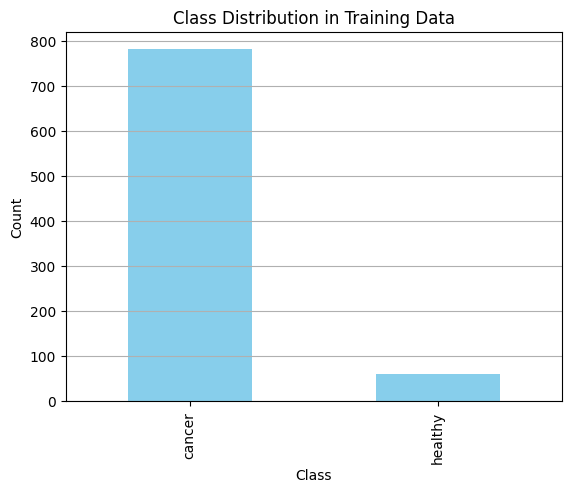

In [ ]:
import matplotlib.pyplot as plt

# Number of occurrences of each class
class_counts = df_train['class_label'].value_counts()

# Print the counts for each class
print("Class counts:")
print(class_counts)

# Plot the distribution of classes
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Training Data')
plt.xticks()
plt.grid(axis='y')
plt.show()

Normalization of the data

In [ ]:
import numpy as np

# Calculate min and max values from X_train
min_values = np.min(X_train, axis=0)
max_values = np.max(X_train, axis=0)

def normalize(x, min_vals, max_vals):
    diff = max_vals - min_vals
    diff[diff == 0] = 1  # Prevent division by zero
    dataset_norm = (x - min_vals) / diff
    return dataset_norm

# Normalize X_train and X_test
X_train = normalize(X_train, min_values, max_values)
X_test = normalize(X_test, min_values, max_values)
# (X_test must be normalized on the same scale as X_train for consistency)


Applying SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# X_train_resampled and y_train_resampled are ready for model training


# Data visualisation

Visualizing the data using the mean frequency of DNA fragments to identify the top N most important features for testing using various models.

In [ ]:
# Seperate data into cancer and healthy
cancer_patients = X_train[y_train == 1]
healthy_patients = X_train[y_train == 0]

print(cancer_patients[:5])
print(healthy_patients[:5])

[[0.0112983  0.00878602 0.00843424 ... 0.10901796 0.11453749 0.11148218]
 [0.01331772 0.01008719 0.01001299 ... 0.10954888 0.1124615  0.11012326]
 [0.01440761 0.01048568 0.01003669 ... 0.10808545 0.11234378 0.11013491]
 [0.01544597 0.01103133 0.01244568 ... 0.10562245 0.11108852 0.10913683]
 [0.01477365 0.01124333 0.01396584 ... 0.10676475 0.11310849 0.1090219 ]]
[[0.0073784  0.00338186 0.00422993 ... 0.11538215 0.1160916  0.11513352]
 [0.38349428 0.41660942 0.42289706 ... 0.35883177 0.36462424 0.3642492 ]
 [0.23107275 0.25169845 0.26331214 ... 0.18816329 0.18192228 0.18078949]
 [0.28358581 0.2898508  0.28420847 ... 0.17646421 0.169984   0.16833388]
 [0.69519729 0.65360213 0.63686065 ... 0.14560873 0.15139376 0.139605  ]]


Text(0.5, 1.0, 'Healthy profile (Median and IQR)')

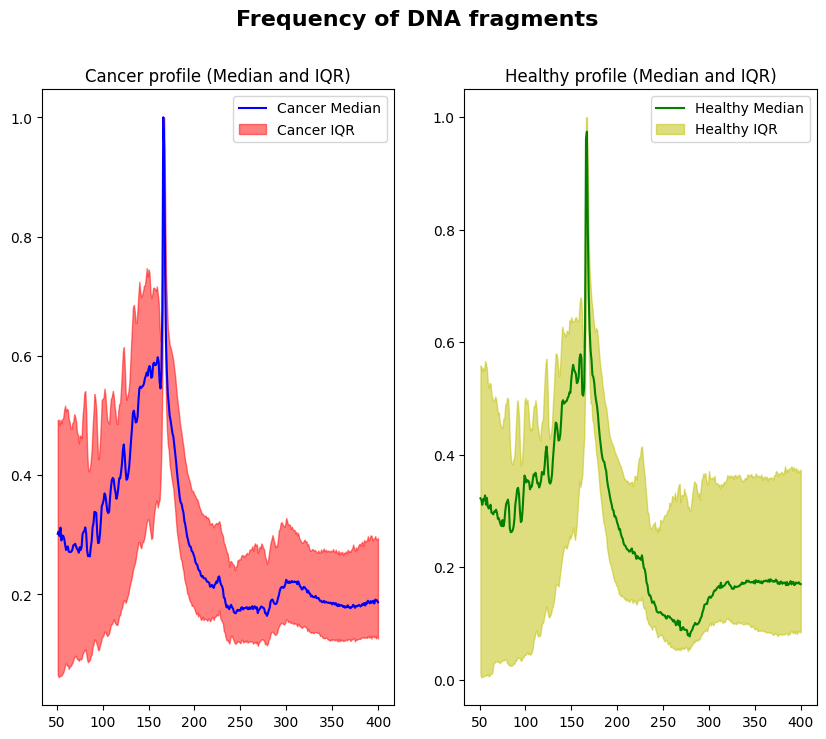

In [ ]:
# Getting statistics on our data for cancer patients
cancer_median = np.median(cancer_patients, axis = 0)
cancer_q1 = np.percentile(cancer_patients, 25, axis = 0)
cancer_q3 = np.percentile(cancer_patients, 75, axis = 0)

# Getting statistics on our data for healthy patients
healthy_median = np.median(healthy_patients, axis = 0)
healthy_q1 = np.percentile(healthy_patients, 25, axis = 0)
healthy_q3 = np.percentile(healthy_patients, 75, axis = 0)

plt.figure(figsize= (10,8))


# Main heading
plt.suptitle("Frequency of DNA fragments", fontsize=16, fontweight='bold')


# First subplot for cancer
plt.subplot(1, 2, 1)
plt.plot(range(51, 401), cancer_median, label = "Cancer Median", color = 'b')
plt.fill_between(range(51, 401), cancer_q1, cancer_q3, color='r', alpha=0.5, label='Cancer IQR', animated = True)
plt.legend(loc = "upper right")
plt.title("Cancer profile (Median and IQR)")

# Second subplot for healthy
plt.subplot(1, 2, 2)
plt.plot(range(51, 401), healthy_median, label = "Healthy Median", color = 'g')
plt.fill_between(range(51, 401), healthy_q1, healthy_q3, color='y', alpha=0.5, label='Healthy IQR', animated = True)
plt.legend(loc = "upper right")
plt.title("Healthy profile (Median and IQR)")



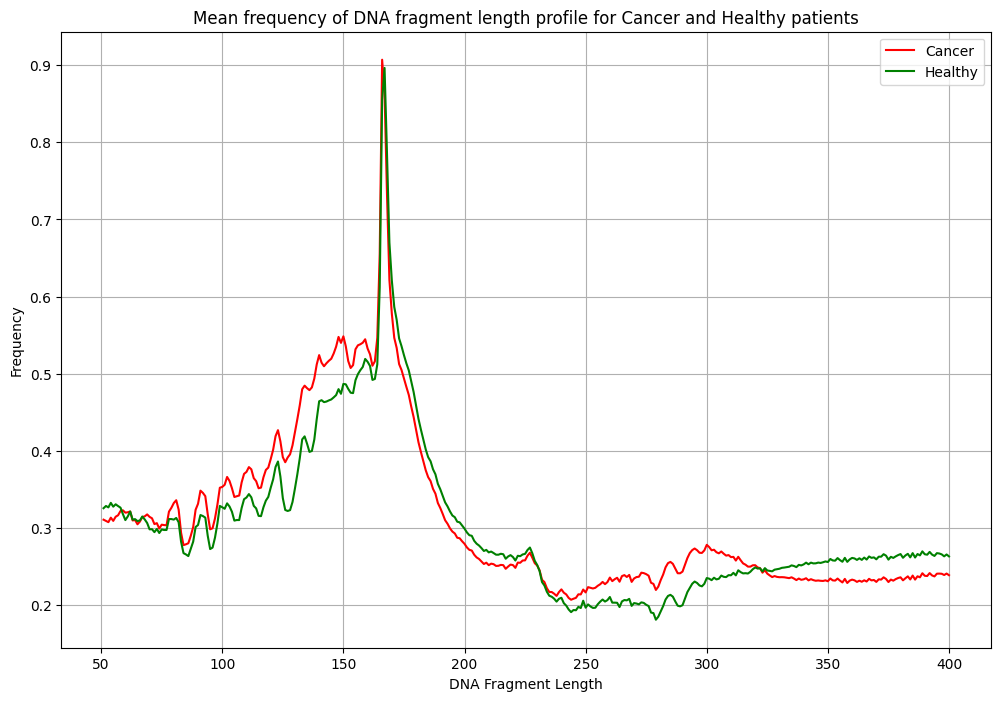

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 8))

# Find mean frequency for each DNA fragment for both cancer and healthy patients
cancer_mean = np.mean(cancer_patients, axis = 0)
healthy_mean = np.mean(healthy_patients, axis = 0)
cancer_max_index = np.argmax(cancer_mean)

# Plot the profiles of cancer and healthy patients
plt.plot(range(51, 401), cancer_mean, label = "Cancer", color = "r")
plt.plot(range(51, 401), healthy_mean, label = "Healthy", color = "g")

plt.legend()

plt.grid()
plt.xlabel("DNA Fragment Length")
plt.ylabel("Frequency")
plt.title("Mean frequency of DNA fragment length profile for Cancer and Healthy patients")
plt.show()

We compare the mean values of each DNA fragment length feature between healthy and cancer samples. By calculating the difference in the means for each feature, we can identify which fragment lengths vary the most between the two groups. These features are likely to be the most significant in distinguishing between healthy and cancerous DNA.

[0.01489248 0.01944161 0.01915845 0.01920362 0.01842042]
Length of difference array: 350
Max difference: 0.0824


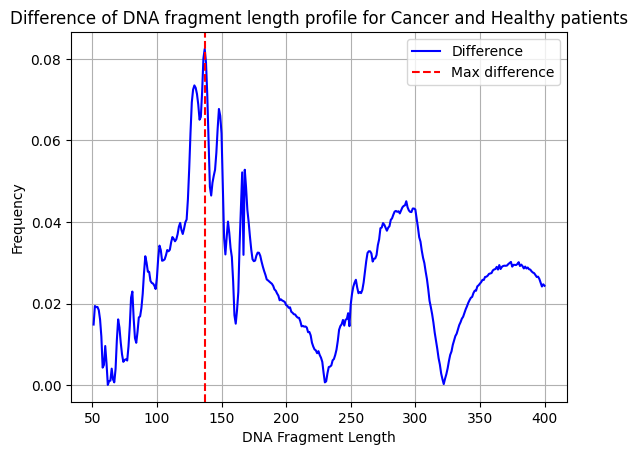

In [ ]:
# Calculate the absolute difference in mean frequencies for each DNA fragment length
difference = abs(cancer_mean - healthy_mean)

# Print the first 5 differences and length of the array for inspection
print(difference[:5])
print("Length of difference array:", len(difference))

# Plot the difference against the DNA fragment lengths (for lengths 51 to 400)
plt.plot(range(51, 51 + len(difference)), difference, label="Difference", color="b")

# Print the index of the maximum difference. This is likely to be the most significant feature in differentiating health and cancer groups
index_of_max = np.argmax(difference)
difference[index_of_max]

# Print the maximum difference
print("Max difference:", round(difference[index_of_max],4))

# Plot a vertical line on the graph to indicate where the maximum difference occurs
# The x-coordinate is adjusted by adding 51 to align with the DNA fragment lengths starting from 51
plt.axvline(x=index_of_max+51, color='r', linestyle='--', label="Max difference") #Plotting the line for DNA fragment with the largest deviation

plt.legend()
plt.grid()
plt.xlabel("DNA Fragment Length")
plt.ylabel("Frequency")
plt.title("Difference of DNA fragment length profile for Cancer and Healthy patients")
plt.show()

In [ ]:
# Indices that sort the difference
indexsort_diff = np.argsort(difference)[::-1]

# For example, the index of the top 30 most deviated DNA fragments
top_30_index = indexsort_diff[:30]



# Print the sorted top 30 indices
print('\nSorted indices of top 30 deviations:', np.sort(top_30_index))

# Hence, the top 30 most deviated DNA fragment lengths ('length_?') are:
top_30 = [index + 51 for index in top_30_index]

print('Top 30 most deviated DNA fragment lengths:', top_30)





Sorted indices of top 30 deviations: [ 74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 115 117 118]
Top 30 most deviated DNA fragment lengths: [137, 136, 138, 129, 130, 128, 135, 131, 139, 127, 132, 148, 149, 134, 133, 147, 126, 150, 140, 146, 125, 168, 145, 166, 144, 143, 151, 141, 169, 142]



# KNN CLASSIFIER
Total of 350 features in the Cancer Detection DataSet,
"length_51" to "length_400", denoting the max normalied frequency of DNA fragment length(...)
after idenitfying the top 30 deviating lengths of DNA, we will be performing the KNN classifiyer based on those lengths.

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import csv

# Function to load data with a variable number of top features
def loadData(filename, top_features):
    """
    Loads the dataset and selects the specified top features.
    """
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        knndata = list(reader)
        knndata = knndata[1:]  # Skip the header
        y = np.array(knndata)[:, -1]  # Extract the labels
        X = np.array(knndata)[:, top_features].astype(float)  # Extract top features

    return X, y

# Function to find the best number of top features and the best k
def evaluate_knn_with_top_features_and_k(train_file, top_feature_list, k_values):
    """
    Evaluates KNN with different top features and k-values using cross-validation.
    Returns the best top feature count and the best k value.
    """
    # Load training data
    knntrainX, knntrainY = loadData(train_file, list(range(350)))  # Load all features initially

    # Convert labels to numeric
    label_encoder = LabelEncoder()
    knntrainY = label_encoder.fit_transform(knntrainY)

    # Standardize the features
    scaler = StandardScaler()
    knntrainX = scaler.fit_transform(knntrainX)

    best_accuracy = 0
    best_top_features = 0
    best_k = 0

    # StratifiedKFold for consistent class distribution in folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Outer loop for top features
    for top_count in top_feature_list:
        print(f"\nEvaluating for top {top_count} features...")
        X_selected = knntrainX[:, :top_count]  # Select top 'top_count' features


        # Inner loop for different k values
        for k in k_values:
            knn = KNeighborsClassifier(n_neighbors=k)
            scores = cross_val_score(knn, X_selected, knntrainY, cv=cv, scoring='accuracy')
            avg_score = np.mean(scores)

            print(f"Top {top_count} features, k={k}, Accuracy={avg_score:.4f}")

            # Update the best parameters if a better score is found
            if avg_score > best_accuracy:
                best_accuracy = avg_score
                best_top_features = top_count
                best_k = k

    print(f"\nBest accuracy achieved: {best_accuracy:.4f}")
    print(f"Best number of top features: {best_top_features}")
    print(f"Best k-value: {best_k}")

    return best_top_features, best_k

# Define the number of top features to evaluate and k values to test
top_feature_list = range(50,201,10)  # Test with different top feature counts
k_values = range(15,41,5)  # Test k values from 1 to 20 can you give me a better range or is this good? i have about 800+ rows of data for context

# Evaluate the best top features and best k-value using the Train_Set.csv file
best_top_features, best_k = evaluate_knn_with_top_features_and_k('/content/Train_Set.csv', top_feature_list, k_values)

# Load the train and test data using the best number of top features
knntestX, knntestY = loadData('/content/Test_Set.csv', list(range(best_top_features)))
selected_trainX, selected_trainY = loadData('/content/Train_Set.csv', list(range(best_top_features)))

# Encode the test labels using the same label encoder as the training set
label_encoder = LabelEncoder()
label_encoder.classes_ = np.array(["healthy", "cancer"])

knntrainY = label_encoder.transform(selected_trainY)
knntestY = label_encoder.transform(knntestY)
# Ensure the labels are numerically consistent

# Standardize the test data
scaler = StandardScaler()
knntrainX = scaler.fit_transform(selected_trainX)
knntestX = scaler.transform(knntestX)

# Train the best KNN model with the selected top features and best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(knntrainX, knntrainY)

# Make predictions on the test set
y_pred = knn_best.predict(knntestX)

# Evaluate the model on the test set
accuracy = accuracy_score(knntestY, y_pred)
confusion = confusion_matrix(knntestY, y_pred)
recall = recall_score(knntestY, y_pred)
f1 = f1_score(knntestY, y_pred)
precision = precision_score(knntestY, y_pred)

# Print the results
print(f"\nFinal accuracy on the test set with top {best_top_features} features and k={best_k}: {accuracy:.4f}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Recall: {recall:.4f}")
print(f"f1 score: {f1:.4f}")
print(f"Precision: {precision:.4f}")


Evaluating for top 50 features...
Top 50 features, k=15, Accuracy=0.9310
Top 50 features, k=20, Accuracy=0.9287
Top 50 features, k=25, Accuracy=0.9287
Top 50 features, k=30, Accuracy=0.9287
Top 50 features, k=35, Accuracy=0.9287
Top 50 features, k=40, Accuracy=0.9287

Evaluating for top 60 features...
Top 60 features, k=15, Accuracy=0.9310
Top 60 features, k=20, Accuracy=0.9298
Top 60 features, k=25, Accuracy=0.9298
Top 60 features, k=30, Accuracy=0.9287
Top 60 features, k=35, Accuracy=0.9287
Top 60 features, k=40, Accuracy=0.9287

Evaluating for top 70 features...
Top 70 features, k=15, Accuracy=0.9346
Top 70 features, k=20, Accuracy=0.9298
Top 70 features, k=25, Accuracy=0.9298
Top 70 features, k=30, Accuracy=0.9287
Top 70 features, k=35, Accuracy=0.9287
Top 70 features, k=40, Accuracy=0.9287

Evaluating for top 80 features...
Top 80 features, k=15, Accuracy=0.9358
Top 80 features, k=20, Accuracy=0.9310
Top 80 features, k=25, Accuracy=0.9298
Top 80 features, k=30, Accuracy=0.9287
To

Without handling class imbalance, the model might be biased toward the majority class, resulting in inflated scores that don’t reflect true performance. By applying SMOTE to resample the underrepresented class, we balance the training data, making it more likely that the classifier will learn features of the minority class effectively.

In [ ]:
from imblearn.over_sampling import SMOTE

# Function to load data with a variable number of top features
def loadData(filename, top_features):
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        knndata = list(reader)
        knndata = knndata[1:]  # Skip the header
        y = np.array(knndata)[:, -1]  # Extract the labels
        X = np.array(knndata)[:, top_features].astype(float)  # Extract top features
    return X, y

# Function to evaluate KNN with SMOTE for class balancing
def evaluate_knn_with_top_features_and_k(train_file, top_feature_list, k_values):
    """
    Evaluates KNN with different top features and k-values using cross-validation.
    Returns the best top feature count and the best k value.
    """
    # Load training data
    knntrainX, knntrainY = loadData(train_file, list(range(350)))  # Load all features initially

    # Convert labels to numeric
    label_encoder = LabelEncoder()
    knntrainY = label_encoder.fit_transform(knntrainY)

    # Standardize the features
    scaler = StandardScaler()
    knntrainX = scaler.fit_transform(knntrainX)

    best_accuracy = 0
    best_top_features = 0
    best_k = 0

    # StratifiedKFold for consistent class distribution in folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Outer loop for top features
    for top_count in top_feature_list:
        print(f"\nEvaluating for top {top_count} features...")
        X_selected = knntrainX[:, :top_count]  # Select top 'top_count' features

        # Apply SMOTE to balance the classes in each fold
        smote = SMOTE(random_state=42)

        # Inner loop for different k values
        for k in k_values:
            knn = KNeighborsClassifier(n_neighbors=k)
            scores = []

            # Perform cross-validation with SMOTE
            for train_index, val_index in cv.split(X_selected, knntrainY):
                X_train, X_val = X_selected[train_index], X_selected[val_index]
                y_train, y_val = knntrainY[train_index], knntrainY[val_index]

                # Apply SMOTE only on the training fold
                X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

                # Fit the model and evaluate on the validation fold
                knn.fit(X_train_smote, y_train_smote)
                scores.append(knn.score(X_val, y_val))

            avg_score = np.mean(scores)
            print(f"Top {top_count} features, k={k}, Accuracy={avg_score:.4f}")

            # Update the best parameters if a better score is found
            if avg_score > best_accuracy:
                best_accuracy = avg_score
                best_top_features = top_count
                best_k = k

    print(f"\nBest accuracy achieved: {best_accuracy:.4f}")
    print(f"Best number of top features: {best_top_features}")
    print(f"Best k-value: {best_k}")

    return best_top_features, best_k

# Define the number of top features to evaluate and k values to test
top_feature_list = range(50, 201, 10)
k_values = range(15,41,5)

# Evaluate the best top features and best k-value using the Train_Set.csv file
best_top_features, best_k = evaluate_knn_with_top_features_and_k('/content/Train_Set.csv', top_feature_list, k_values)

# Load the train and test data using the best number of top features
knntestX, knntestY = loadData('/content/Test_Set.csv', list(range(best_top_features)))
selected_trainX, selected_trainY = loadData('/content/Train_Set.csv', list(range(best_top_features)))

# Encode the test labels using the same label encoder as the training set
label_encoder = LabelEncoder()
label_encoder.classes_ = np.array(["healthy", "cancer"])

knntrainY = label_encoder.transform(selected_trainY)
knntestY = label_encoder.transform(knntestY)

# Standardize the test data
scaler = StandardScaler()
knntrainX = scaler.fit_transform(selected_trainX)
knntestX = scaler.transform(knntestX)

# Apply SMOTE on the training data for the best model training
smote = SMOTE(random_state=42)
knntrainX_smote, knntrainY_smote = smote.fit_resample(knntrainX, knntrainY)

# Train the best KNN model with the selected top features and best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(knntrainX_smote, knntrainY_smote)

# Make predictions on the test set
y_pred = knn_best.predict(knntestX)

# Evaluate the model on the test set
accuracy = accuracy_score(knntestY, y_pred)
confusion = confusion_matrix(knntestY, y_pred)
recall = recall_score(knntestY, y_pred)
f1 = f1_score(knntestY, y_pred)
precision = precision_score(knntestY, y_pred)

# Print the results
print(f"\nFinal accuracy on the test set with top {best_top_features} features and k={best_k}: {accuracy:.4f}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Recall: {recall:.4f}")
print(f"f1 score: {f1:.4f}")
print(f"Precision: {precision:.4f}")



Evaluating for top 50 features...
Top 50 features, k=15, Accuracy=0.7146
Top 50 features, k=20, Accuracy=0.7241
Top 50 features, k=25, Accuracy=0.6813
Top 50 features, k=30, Accuracy=0.6908
Top 50 features, k=35, Accuracy=0.6647
Top 50 features, k=40, Accuracy=0.6766

Evaluating for top 60 features...
Top 60 features, k=15, Accuracy=0.7348
Top 60 features, k=20, Accuracy=0.7289
Top 60 features, k=25, Accuracy=0.6944
Top 60 features, k=30, Accuracy=0.7015
Top 60 features, k=35, Accuracy=0.6849
Top 60 features, k=40, Accuracy=0.6956

Evaluating for top 70 features...
Top 70 features, k=15, Accuracy=0.7253
Top 70 features, k=20, Accuracy=0.7348
Top 70 features, k=25, Accuracy=0.7099
Top 70 features, k=30, Accuracy=0.7170
Top 70 features, k=35, Accuracy=0.6991
Top 70 features, k=40, Accuracy=0.7027

Evaluating for top 80 features...
Top 80 features, k=15, Accuracy=0.7788
Top 80 features, k=20, Accuracy=0.7693
Top 80 features, k=25, Accuracy=0.7431
Top 80 features, k=30, Accuracy=0.7503
To

In [ ]:
# Saving KNN model
import pickle
with open('knn_model.pkl', 'wb') as model_file:
    pickle.dump(knn_best, model_file)


# Logistic Regression


The next model we want to implement is a logistic regression model using the sklearn library. The process will involve the following key steps:
- Hyperparameter Optimization over:
1. various feature counts
2. various C values
- Model evaluation using different metrics from sklearn




In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_model_with_different_features(X_train, y_train, indexsort_diff, feature_counts, cv=5, random_state=42):
    """
    Evaluates a Logistic Regression model using cross-validation for different feature counts.

    Parameters:
    - X_train: Feature matrix for training data
    - y_train: Labels for training data
    - indexsort_diff: Indices that sort the difference in mean frequencies
    - feature_counts: List of different feature counts to evaluate
    - cv: Number of cross-validation folds (default is 5)
    - random_state: Seed for random number generator for reproducibility

    Returns:
    - best_count: The feature count that yields the best average cross-validation accuracy
    - accuracies: List of accuracies for each evaluated feature count
    """

    accuracies = []  # Initialize list to store accuracy for each iteration
    recalls = []
    precisions =[]
    f1s =[]

    # KFold cross-validation
    kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)

    # Evaluate model for different numbers of selected features
    for N in feature_counts:
        print(f"\nEvaluating for top {N} features...")
        index = indexsort_diff[:N]  # Indices that give the top N features
        X_selected = X_train[:, index]  # Select the top N features


        model = LogisticRegression(max_iter=1000, class_weight='balanced')  # Initialize logistic regression model, class_weight='balanced'

        # Cross-validation accuracy
        accuracy = cross_val_score(model, X_selected, y_train, cv=kf, scoring='accuracy')
        avg_accuracy = np.mean(accuracy)  # Calculate average accuracy

        # Cross-validation recall
        recall = cross_val_score(model, X_selected, y_train, cv=kf, scoring='recall')
        avg_recall = np.mean(recall)

        # Cross-validation precision
        precision = cross_val_score(model, X_selected, y_train, cv=kf, scoring='precision')
        avg_precision = np.mean(precision)

        # Cross-validtion f1
        f1 = cross_val_score(model, X_selected, y_train, cv=kf, scoring='f1')
        avg_f1 = np.mean(f1)

        print(f"Cross-Validation Accuracy: {avg_accuracy:.4f}")
        print(f"Cross-validaiton Recall: {avg_recall:.4f}")
        print(f"Cross-validaiton Precision: {avg_precision:.4f}")
        print(f"Cross-validaiton F1: {avg_f1:.4f}")

        accuracies.append(avg_accuracy)
        recalls.append(avg_recall)
        precisions.append(avg_precision)
        f1s.append(avg_f1)

    return accuracies, recalls, precisions, f1s





In [ ]:
feature_counts = [i for i in range(50,201,10)]  # Vary number of features
# Evaluate model and collect scores
accuracies, recalls, precisions, f1s = evaluate_model_with_different_features(X_train, y_train, indexsort_diff, feature_counts)


Evaluating for top 50 features...
Cross-Validation Accuracy: 0.6694
Cross-validaiton Recall: 0.6683
Cross-validaiton Precision: 0.9649
Cross-validaiton F1: 0.7895

Evaluating for top 60 features...
Cross-Validation Accuracy: 0.7003
Cross-validaiton Recall: 0.6977
Cross-validaiton Precision: 0.9715
Cross-validaiton F1: 0.8118

Evaluating for top 70 features...
Cross-Validation Accuracy: 0.7087
Cross-validaiton Recall: 0.7040
Cross-validaiton Precision: 0.9753
Cross-validaiton F1: 0.8173

Evaluating for top 80 features...
Cross-Validation Accuracy: 0.7217
Cross-validaiton Recall: 0.7195
Cross-validaiton Precision: 0.9741
Cross-validaiton F1: 0.8274

Evaluating for top 90 features...
Cross-Validation Accuracy: 0.7313
Cross-validaiton Recall: 0.7285
Cross-validaiton Precision: 0.9759
Cross-validaiton F1: 0.8341

Evaluating for top 100 features...
Cross-Validation Accuracy: 0.7241
Cross-validaiton Recall: 0.7234
Cross-validaiton Precision: 0.9724
Cross-validaiton F1: 0.8294

Evaluating for

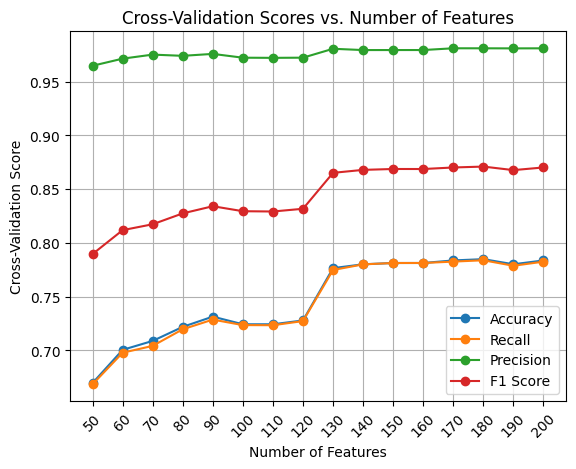

In [ ]:
# Plotting scores vs. number of features
plt.plot(feature_counts, accuracies, marker='o', label='Accuracy')
plt.plot(feature_counts, recalls, marker='o', label='Recall')
plt.plot(feature_counts, precisions, marker='o', label='Precision')
plt.plot(feature_counts, f1s, marker='o', label='F1 Score')

plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Scores vs. Number of Features')
plt.xticks(feature_counts, rotation = 45)
plt.grid()

plt.legend()

It is important to note that the most significant increase in accuracy occurs when the feature count increases from 120 to 130.
Therefore, for our final model, we will select the X values based on this finding and utilize 130 features.

In [ ]:
# Set chosen feature count
best_N = 130

# Prepare X train for final model according to selected features
index_of_selected_features = indexsort_diff[:130]
X_train_lr = X_train[:, index_of_selected_features]

# Prepare X test
X_test_lr = X_test[:, index_of_selected_features]

print('Shape of X train for logistic model:', np.shape(X_train_lr))
print('Shape of X test for logistic model:', np.shape(X_test_lr))

Shape of X train for logistic model: (841, 130)
Shape of X test for logistic model: (409, 130)


In the next section, we wish to explore the relationship between the hyperparameter 'C' in the logistic regresion model with respect to how the model performs. We implement a K-fold cross-validation grid search algorithm using GridSearchCV (code takes about a minute to run).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, metrics
from sklearn.model_selection import GridSearchCV

# Parameter grid for C
c_values = np.logspace(-5, 5, 100)
grid = {'C': c_values}

# Initialize the logistic regression model with class_weight balanced
logistic_model = linear_model.LogisticRegression(class_weight='balanced', max_iter=1000)

# Use GridSearchCV to find the optimal C value
grid_search = GridSearchCV(estimator=logistic_model, param_grid=grid, scoring='accuracy', cv=5)  # 5-fold cross-validation
grid_search.fit(X_train_lr, y_train)  # Fit training data

# Best C value and corresponding accuracy
best_C = grid_search.best_params_['C']
best_accuracy = grid_search.best_score_

print(f"Max cross-validation accuracy: {best_accuracy:.4f}")
print(f"C with the max score: {best_C}")


Max cross-validation accuracy: 0.9156
C with the max score: 100000.0


To visualise the relationship, we plot a graph.

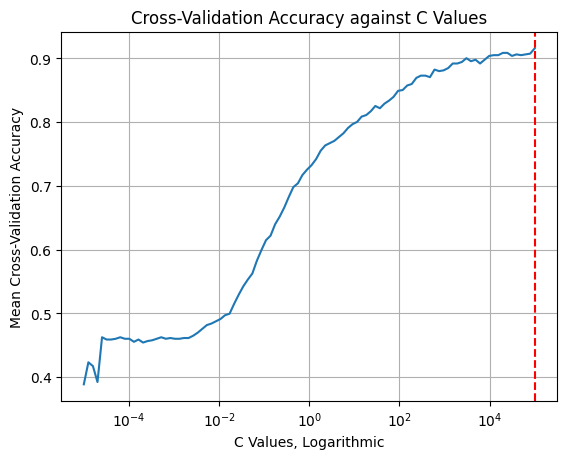

In [ ]:
# Results for plotting
res = grid_search.cv_results_
mean_scores = res['mean_test_score'] # Get mean sore for each fold

# Plotting accuracy vs. C values
plt.plot(c_values, mean_scores)
plt.xscale('log')  # Use a logarithmic scale for C values
plt.axvline(x=best_C, color='r', linestyle='--')
plt.title('Cross-Validation Accuracy against C Values')
plt.xlabel('C Values, Logarithmic')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid()

We note from the graph that as C increases, accuracy generally continues to increase although theoretically, it should decline after a certain point.

For simplicity, we choose to use C=1.0 as a balanced value to mitigate both overfitting and underfitting in our model.

In [ ]:
from sklearn import linear_model
from sklearn import metrics


logistic_model = linear_model.LogisticRegression(class_weight='balanced', C=1.0, max_iter=1000)


# Train the model
logistic_model.fit(X_train_lr, y_train)

# Make predictions on the test set
predicted_y = logistic_model.predict(X_test_lr)

# Compute the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted_y)

# Evaluation metrics
accuracy = metrics.accuracy_score(y_test, predicted_y)
precision = metrics.precision_score(y_test, predicted_y)
recall = metrics.recall_score(y_test, predicted_y)
f1 = metrics.f1_score(y_test, predicted_y)


print('\nAccuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('f1-score:', f1)






Accuracy: 0.7872860635696821
Precision: 0.9667774086378738
Recall: 0.7907608695652174
f1-score: 0.8699551569506726


Using the best C value to build our logistic regression model and evaluating its AUC.

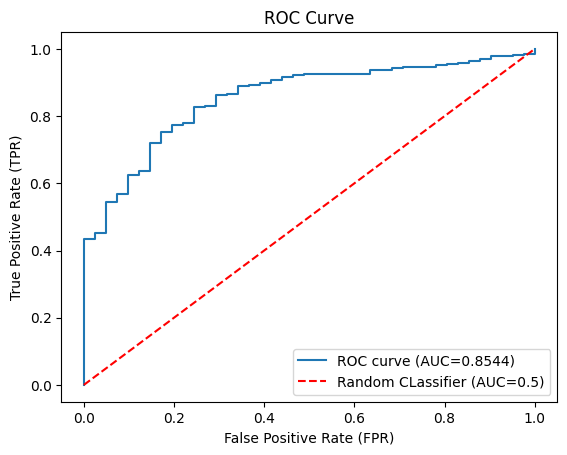

In [ ]:
# predicted probabilities
predicted_probs = logistic_model.predict_proba(X_test_lr)[:, 1]

# FPR, TPR, and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_probs)

# calculate AUC
auc_value = metrics.auc(fpr, tpr)
auc_value= round(auc_value, 4)

# ROC curve
plt.plot(fpr, tpr, label= f'ROC curve (AUC={auc_value})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random CLassifier (AUC=0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()




In [ ]:
# Save logistic regression model
import pickle
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(logistic_model, model_file)

# Random Forest
The last model we are using is the random forest algorithm using the sklearn library. The process will involve the following steps:

*   Hyperparameter optimization over:
   1.   Various feature counts
   2.   Various values of number of trees (n_estimator)


*   Model evaluation using different metrics from sklearn



(code will take about a minute to run)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# List to store the average cross-validation score for each number of features
cv_scores = []
feature_counts = range(50, 201, 10)  # Evaluate in steps of 10 features

# Perform cross-validation for each feature count
for n_features in feature_counts:
    selected_features = indexsort_diff[:n_features]  # Select the top `n_features`
    X_subset = X_train_resampled[:, selected_features]  # Subset the dataset to only these features

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Set n_estimators as required

    # Perform cross-validation
    scores = cross_val_score(rf_model, X_subset, y_train_resampled, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())  # Store the average score for this subset size

# Identify the best number of features based on highest cross-validation score
best_score_index = np.argmax(cv_scores)
best_feature_count = feature_counts[best_score_index]
best_score = cv_scores[best_score_index]

print("Best number of features:", best_feature_count)
print("Cross-validation accuracy:", best_score)


Best number of features: 100
Cross-validation accuracy: 0.8937576800196609


In the section we explore the hyperparameter n_estimators which is the number of trees. We use 5-fold cross-validation to evaluate the optimal value for n_estimators.

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define a parameter grid for n_estimators
param_grid = {
    'n_estimators': list(range(90, 111))
}

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Select the top features (for demonstration, using the previously defined top features)
X_train_best = X_train_resampled[:, indexsort_diff[:best_feature_count]]

# Fit the grid search model
grid_search.fit(X_train_best, y_train_resampled)

# Get the best parameters and their corresponding score
best_n_estimators = grid_search.best_params_['n_estimators']
best_accuracy = grid_search.best_score_

# Print the results
print(f"Best number of trees (n_estimators): {best_n_estimators}")
print(f"Best cross-validated accuracy: {best_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best number of trees (n_estimators): 103
Best cross-validated accuracy: 0.8957


Based on the best feature count and best value for n_estimator we trained the model.

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming `best_feature_count` is the number of top features that performed best
best_features = indexsort_diff[:best_feature_count]
X_train_best = X_train_resampled[:, best_features]
X_test_best = X_test[:, best_features]

# Initialize and train the final Random Forest model
final_rf_model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42, class_weight='balanced')
final_rf_model.fit(X_train_best, y_train_resampled)

# Make predictions on the test set
y_pred = final_rf_model.predict(X_test_best)

# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
print("Final Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Final Model Accuracy: 0.8581907090464548

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.63      0.47        41
           1       0.96      0.88      0.92       368

    accuracy                           0.86       409
   macro avg       0.67      0.76      0.70       409
weighted avg       0.90      0.86      0.87       409


Confusion Matrix:
 [[ 26  15]
 [ 43 325]]


In [ ]:
# Save random forest model
import pickle
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(final_rf_model, model_file)